## Get to know the networkx-library

### Simple node and edge creation/deletion

In [1]:
import networkx as nx

In [51]:
# Initializes a graph
G = nx.Graph()

# Manually setting vertices, edges ...
G.add_node('Y')
G.add_node('Z')
G.add_edge('Y','Z')

# Clear the existing structure
G.clear()
G.number_of_nodes(), G.number_of_edges()

(0, 0)

In [52]:
# Set multiple at once
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
G.add_edges_from([('A','B'), ('C','E'), ('E','B'), ('D','A'), ('D','B'), ('C','D')])

G.add_node('ONE') # One vertice: ONE
G.add_nodes_from('ONE') # 3 vertices

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

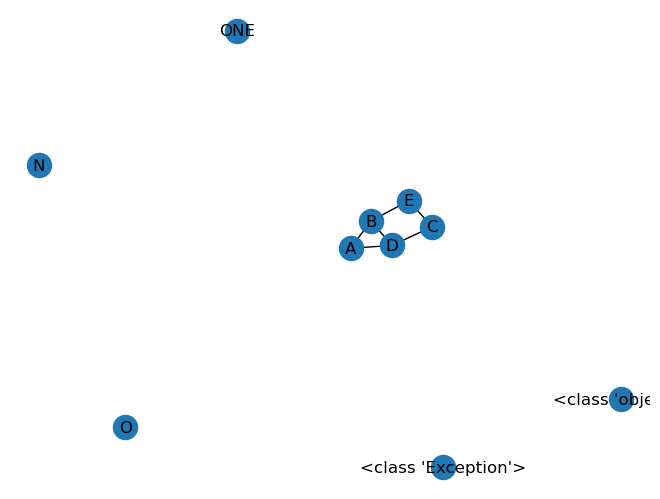

In [53]:
# Set any object (hashable) as vertex in networkx

G.add_node(object)
G.add_node(Exception)

nx.draw(G,with_labels='True')

# Use convert_node_labels_to_integers() for easy and safe conversion

In [70]:
print(G.nodes, G.edges)

# Edges can have attributes
G['A']['B']['weight'] = '40'

try: # This raises Key Error since edge not there
    G['N']['B']['color'] = 'yellow' 
except KeyError as e:
    print('Error: ', type(e))
        
G['A']['D']['year'] = 2001 # This edge exists
print(G.nodes, G.edges)
print(G['A']['D'])

['A', 'B', 'C', 'D', 'E', 'ONE', 'O', 'N', <class 'object'>, <class 'Exception'>] [('A', 'B'), ('A', 'D'), ('B', 'E'), ('B', 'D'), ('C', 'E'), ('C', 'D')]
Error:  <class 'KeyError'>
['A', 'B', 'C', 'D', 'E', 'ONE', 'O', 'N', <class 'object'>, <class 'Exception'>] [('A', 'B'), ('A', 'D'), ('B', 'E'), ('B', 'D'), ('C', 'E'), ('C', 'D')]
{'year': 2001}


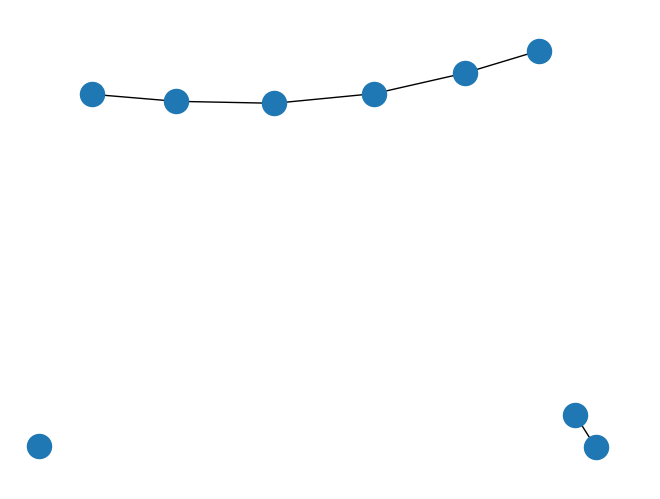

In [28]:
# Creates a 'line graph' with max 2 edges on one node
H = nx.path_graph(10)
H.remove_node(2)
H.remove_edge(3,4)
nx.draw(H)

In [74]:
# This shows all elements of the graph
H.edges, H.nodes

(EdgeView([(0, 1), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]),
 NodeView((0, 1, 3, 4, 5, 6, 7, 8, 9)))

In [76]:
# Regarding weights ...
G.clear()

G.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

# Always useful 
G.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

In [72]:

for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


### Larger graphs

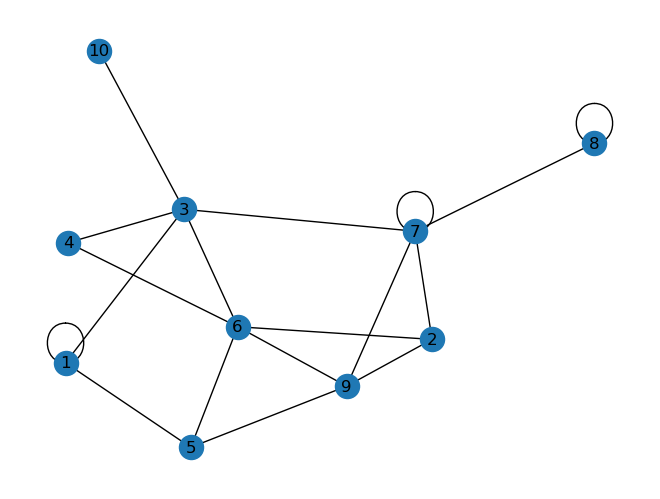

In [83]:
# Lets be more dingue
import random

G2 = nx.Graph()
nodes = [str(i) for i in range(1, 11)]
G2.add_nodes_from(nodes)

num_edges=len(nodes)*2
edges_indices=[]
for i in range(num_edges):
    p1=random.sample(nodes,k=1) # This is to allow for self directed egdes
    p2=random.sample(nodes,k=1)
    edges_indices.append((p1[0],p2[0]))
G2.add_edges_from(edges_indices)

nx.draw(G2, with_labels='True')

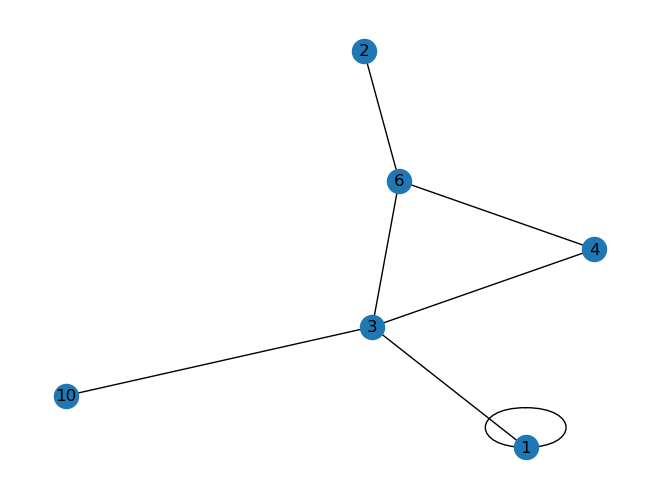

In [93]:
# Creates a subgraph of G
G2_sub = nx.subgraph(G2, ['1','2','3','4','6','10'])
nx.draw(G2_sub, with_labels='True')

### Reading in data and creating graphs of them

In [94]:
import pandas as pd

file_path = '/Users/inuit/Documents/Gitrepos/GraphTheory/Data/Districts of Gujarat.xlsx'

# Use pandas to read the Excel file
sheet_name = 'Sheet3' 
# Use pandas to read the specified sheet from the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.head(10)

,Districts,Ahmedabad,Amreli,Anand,Aravalli,Banaskantha,Bharuch,Bhavnagar,Botad,Chhota Udaipur,...,Panchmahal,Patan,Porbandar,Rajkot,Sabarkantha,Surat,Surendranagar,Tapi,Vadodara,Valsad
0,Ahmedabad,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,Amreli,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Anand,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Aravalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Banaskantha,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,Bharuch,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,Bhavnagar,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Botad,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
8,Chhota Udaipur,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,Dahod,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


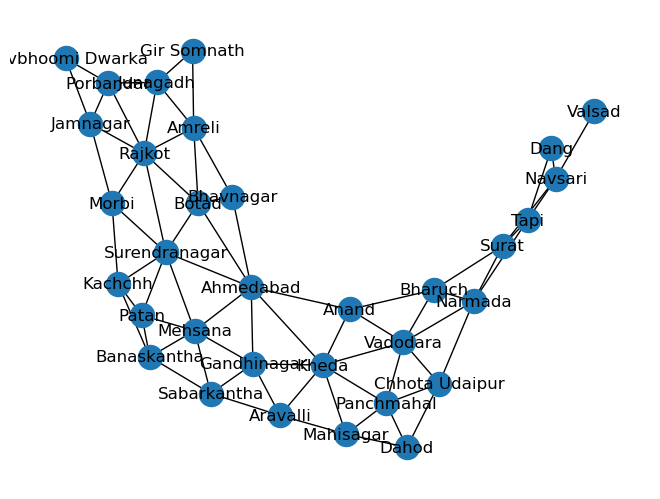

In [95]:
# Put the data into a graph
G3 = nx.Graph()

values = []

for label, value in df.items():
    values.append(df[label].values)

names = values.pop(0) # Names of districts are in first element

assert(len(values) == len(names))

edges = []

# This makes a the edge pairing if 1
for indice, i in enumerate(names):
    pairs = [(i, name) for value, name in zip(values[indice], names) if value == 1]
    edges.append(pairs)
    
for e in edges:
    G3.add_edges_from(e)
    
nx.draw(G3, with_labels='True')

In [96]:
# Matches with data
G3.adj['Tapi'], G3.degree['Tapi']

(AtlasView({'Dang': {}, 'Narmada': {}, 'Navsari': {}, 'Surat': {}}), 4)

In [19]:
# Save graph to file

import pickle

# save graph object to file, use binary
pickle.dump(G3, open('../Data/Districts_of_Gujarat.pickle', 'wb'))

# load graph object from file
G = pickle.load(open('../Data/Districts_of_Gujarat.pickle', 'rb'))

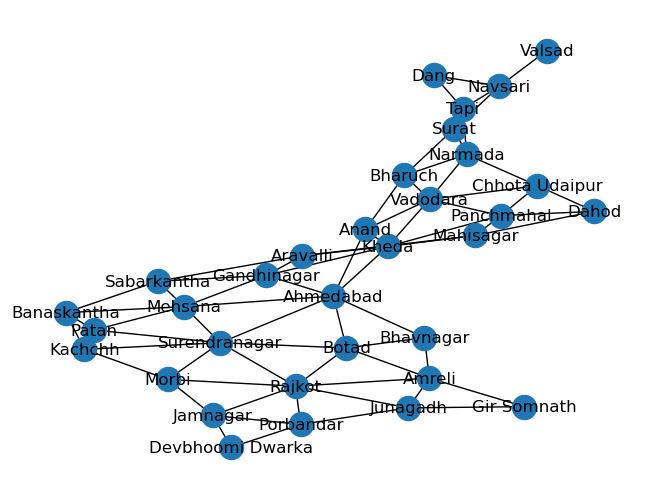

In [20]:
nx.draw(G, with_labels='True')

### What graph classes are there?


[('ROMA', 'MILAN', 0), ('PARIS', 'LYON', 0), ('PARIS', 'LYON', 1)]


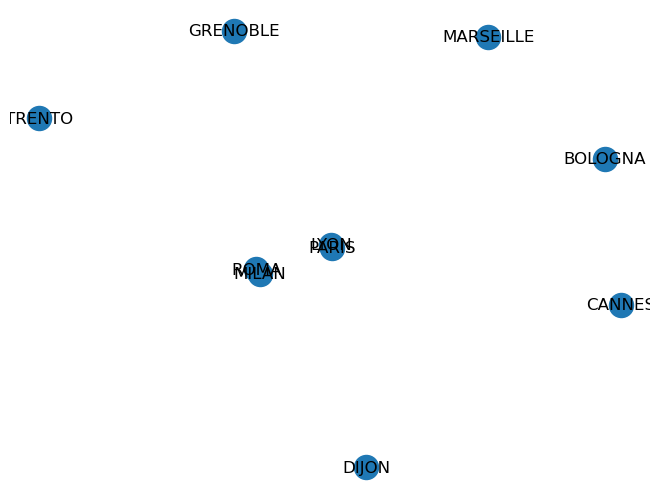

In [120]:
MG = nx.MultiGraph() # Multiple edges between 2 nodes allowd, self directed edges allowed

MG.add_nodes_from(['ROMA','PARIS','DIJON','MILAN','LYON','GRENOBLE','TRENTO','BOLOGNA','CANNES','MARSEILLE'])

MG.add_weighted_edges_from([('ROMA','MILAN', 179.8), ('PARIS', 'LYON', 441.4), ('LYON', 'PARIS', 512.1)])

nx.draw(MG, with_labels='True')

print(MG.edges)

In [ ]:
DG = nx.DiGraph()

In [ ]:
DMG = nx.MultiDiGraph()

### What are the jobs we networkx can do for us?

- Shortest ways?
- Coloring?
- Optimize 
  - Transversion plan (e.g. Metro)
  - Edge construction
  - Create subgraphs
- ...

Many things.

---------
Next I will try to extend the graph with node- and edge attributes. 
Once that is done I will bother a good visualization and then start to apply alg. for optimization.

That **Follows in Notebook 2**

---------